# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="yellow"><h1>BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXEDDEPOSIT) or not</h1></font></div>

# <font color="red">__Description__</font>

A Portuguese bank is experiencing a decline in revenue due to reduced client deposits. The goal is to predict which clients are more likely to subscribe to term deposits, allowing the bank to focus marketing efforts and increase profitability.

- __Data Overview:__

> - Train Dataset (train.csv): Client and call details, including the target variable "subscribed" (YES/NO).
> - Test Dataset (test.csv): Used for predictions.

- __Key Features:__

> - Client attributes: age, job, marital status, education, etc.
> - Communication details: type, month, day, duration.
> - Historical campaign data: previous contacts, outcomes.

- __Objective:__
Develop a predictive model to forecast term deposit subscriptions based on client and campaign data.

- __Outcome:__
An optimized telephonic marketing strategy targeting potential subscribers, improving the bank's revenue.

## <font color="red">Step By Step Notebook</font>
1. Data Collection
2. Data Exploration
3. Machine Learning
4. Conclusion 

## <font color="red">Data Collection</font>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv"
train_data = pd.read_csv(train_url)
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train_data.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
test_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv"
test_data = pd.read_csv(test_url)
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [6]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
test_data.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


## <font color="red">Data Exploration</font>

In [8]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [10]:
train_data.shape

(31647, 18)

In [11]:
test_data.shape

(13564, 17)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [14]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

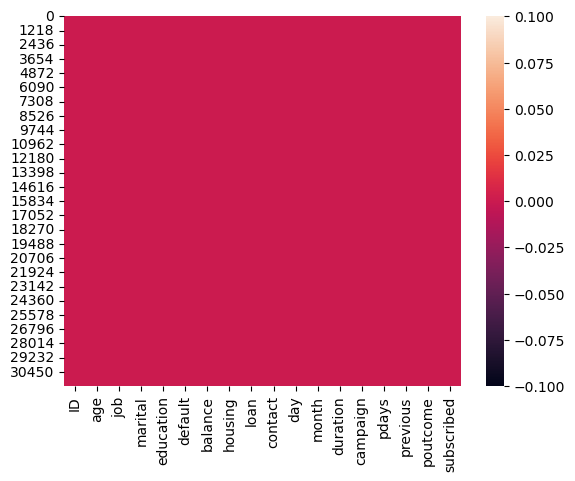

In [15]:
import seaborn as sns
sns.heatmap(train_data.isnull())

In [16]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

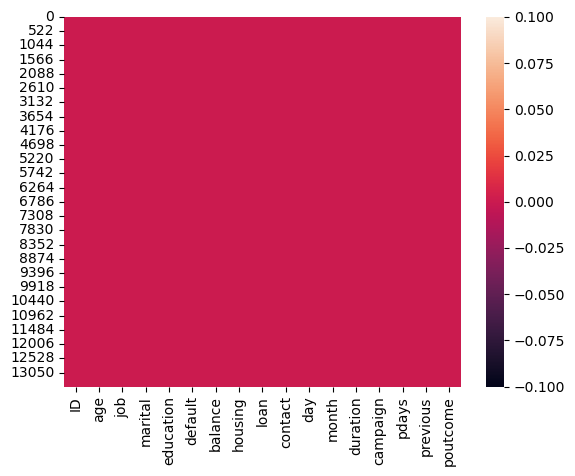

In [17]:
sns.heatmap(test_data.isnull())

We can see non of the Data Set contains null values.

In [18]:
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [19]:
test_data.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

Both the data sets consists of 2 different datatypes : Object and int64

In [20]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [22]:
train_data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

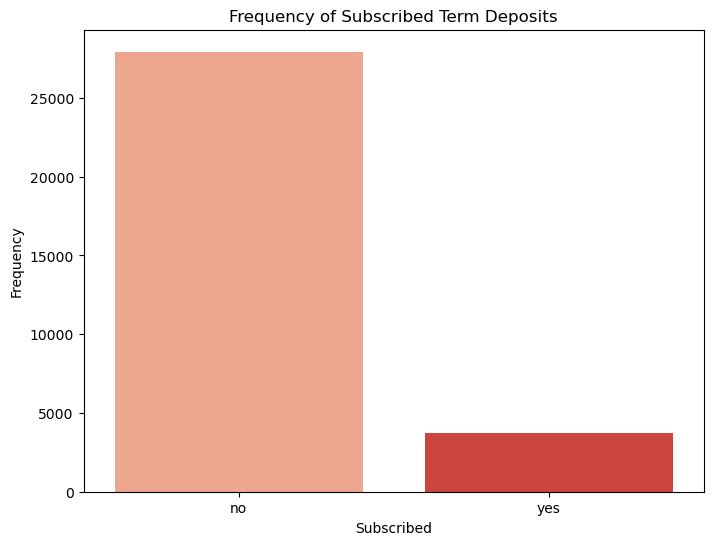

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='subscribed', palette='Reds')

plt.xlabel('Subscribed')
plt.ylabel('Frequency')
plt.title('Frequency of Subscribed Term Deposits')
plt.show()

In [24]:
# Encode categorical variables for train_data
label_encoder = LabelEncoder()
train_data['job'] = label_encoder.fit_transform(train_data['job'])
train_data['marital'] = label_encoder.fit_transform(train_data['marital'])
train_data['education'] = label_encoder.fit_transform(train_data['education'])
train_data['default'] = label_encoder.fit_transform(train_data['default'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['contact'] = label_encoder.fit_transform(train_data['contact'])
train_data['month'] = label_encoder.fit_transform(train_data['month'])
train_data['day'] = label_encoder.fit_transform(train_data['day'])
train_data['poutcome'] = label_encoder.fit_transform(train_data['poutcome'])
train_data['subscribed'] = label_encoder.fit_transform(train_data['subscribed'])

In [25]:
label_encoder_test = LabelEncoder()

# Transform categorical variables in the test dataset 
test_data['job'] = label_encoder_test.fit_transform(test_data['job'])
test_data['marital'] = label_encoder_test.fit_transform(test_data['marital'])
test_data['education'] = label_encoder_test.fit_transform(test_data['education'])
test_data['default'] = label_encoder_test.fit_transform(test_data['default'])
test_data['housing'] = label_encoder_test.fit_transform(test_data['housing'])
test_data['loan'] = label_encoder_test.fit_transform(test_data['loan'])
test_data['contact'] = label_encoder_test.fit_transform(test_data['contact'])
test_data['month'] = label_encoder_test.fit_transform(test_data['month'])
test_data['day'] = label_encoder_test.fit_transform(test_data['day'])
test_data['poutcome'] = label_encoder_test.fit_transform(test_data['poutcome'])

In [26]:
# Normalize the frequency of the 'subscribed' variable
print(train_data['subscribed'].value_counts(normalize=True))

0    0.882611
1    0.117389
Name: subscribed, dtype: float64


This means that approximately 88.26% of the observations have 'no' in the 'subscribed' column, and 11.74% have 'yes'.

### <font color="red">Univariate Analysis</font>

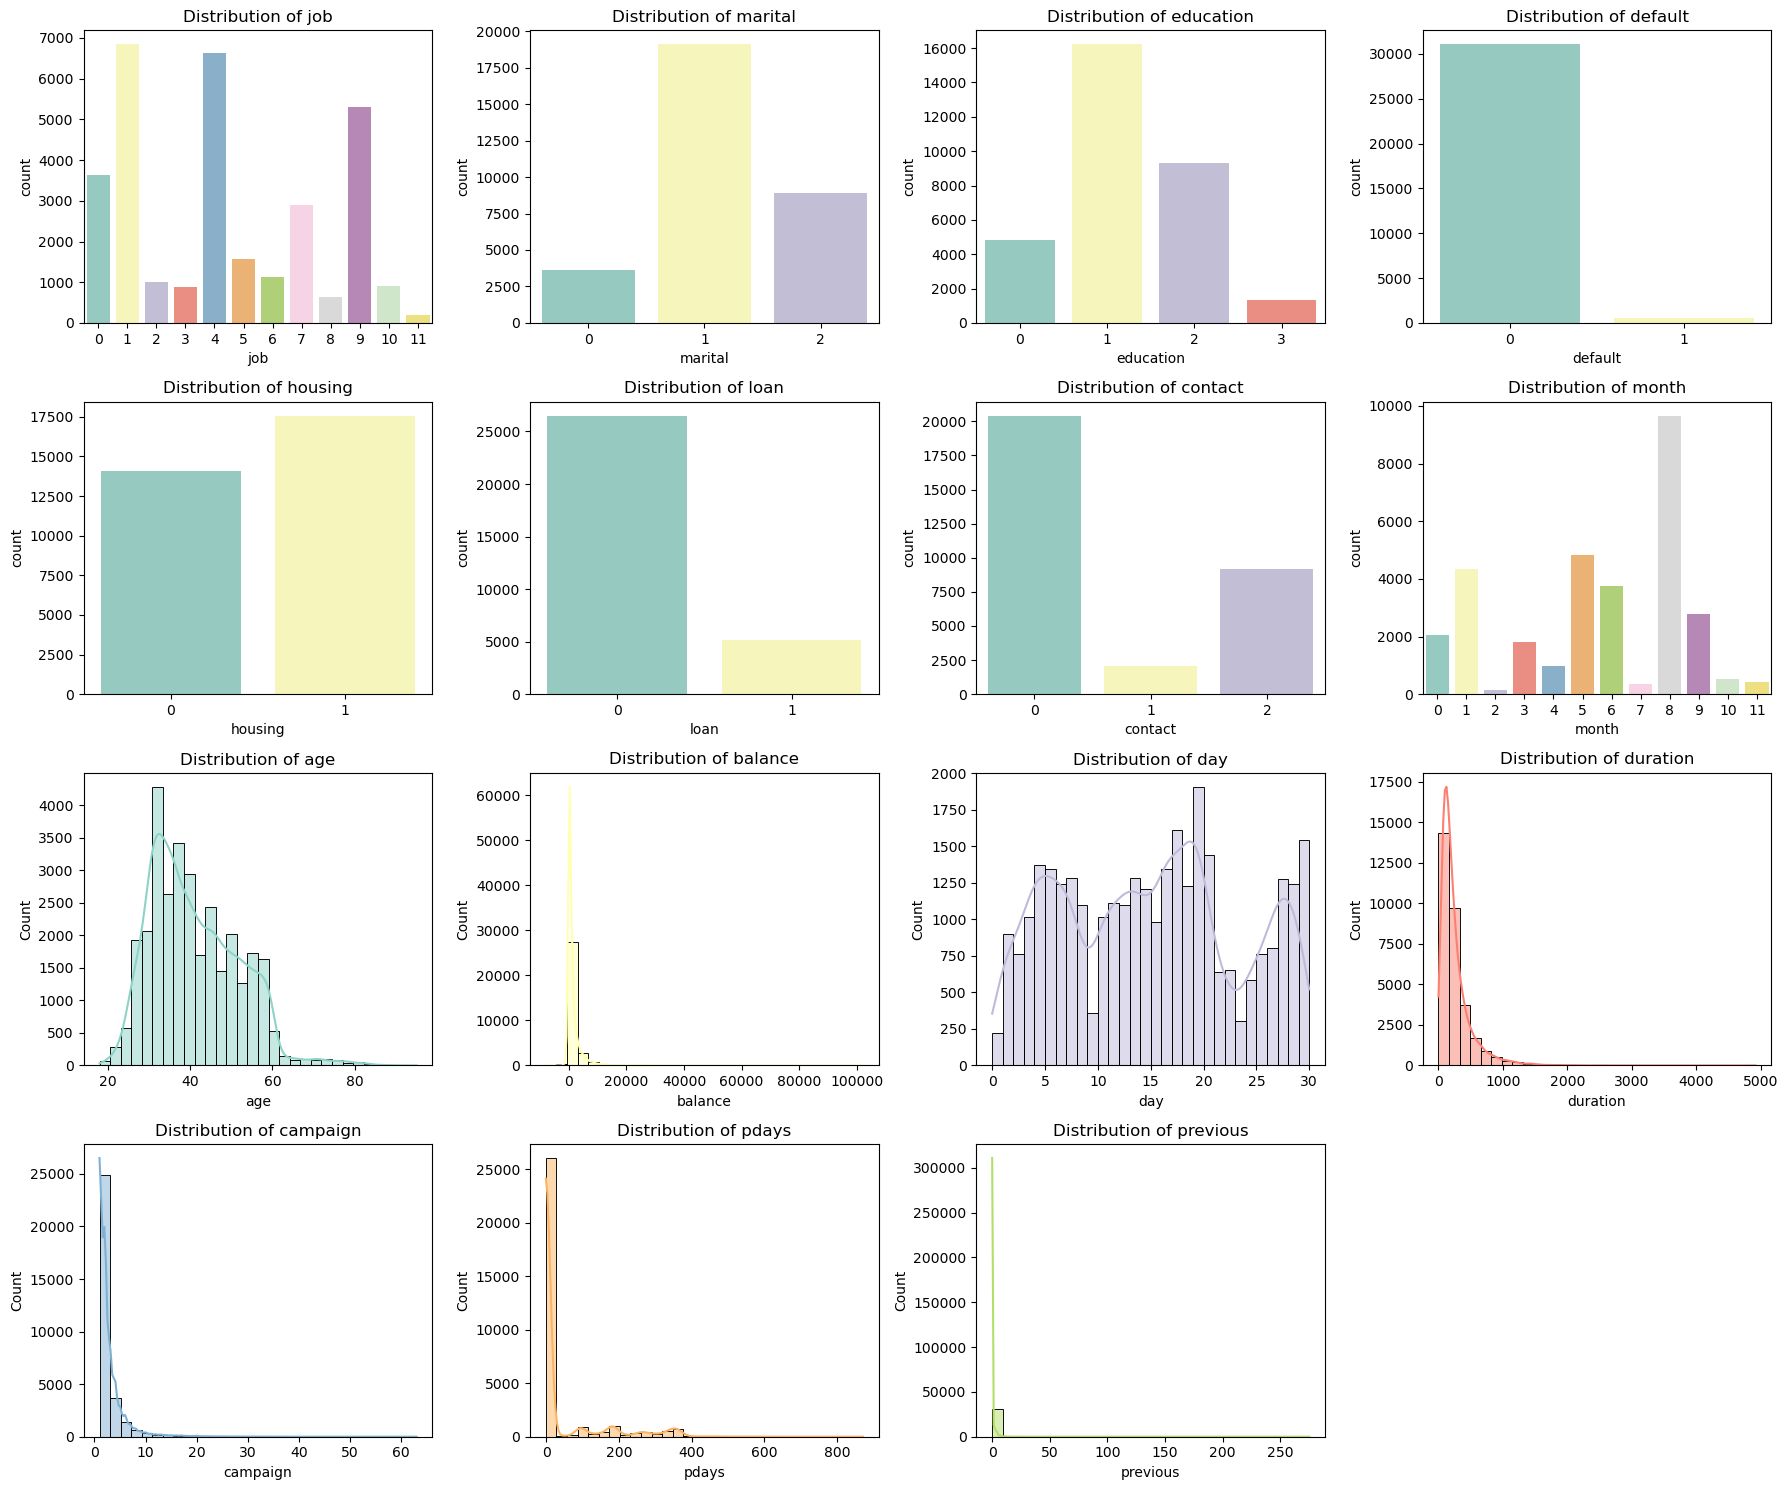

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 15))
color_palette = "Set3"

# Categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for i, var in enumerate(categorical_vars):
    sns.countplot(data=train_data, x=var, ax=axes[i // 4, i % 4], palette=color_palette)
    axes[i // 4, i % 4].set_title(f'Distribution of {var}')

# Numerical variables
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for i, var in enumerate(numerical_vars):
    sns.histplot(train_data[var], bins=30, kde=True, ax=axes[(i + len(categorical_vars)) // 4, (i + len(categorical_vars)) % 4], color=sns.color_palette(color_palette)[i])
    axes[(i + len(categorical_vars)) // 4, (i + len(categorical_vars)) % 4].set_title(f'Distribution of {var}')

for i in range(len(categorical_vars) + len(numerical_vars), 4 * 4):
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.show()

### <font color='red'>Bivariate Analysis</font>

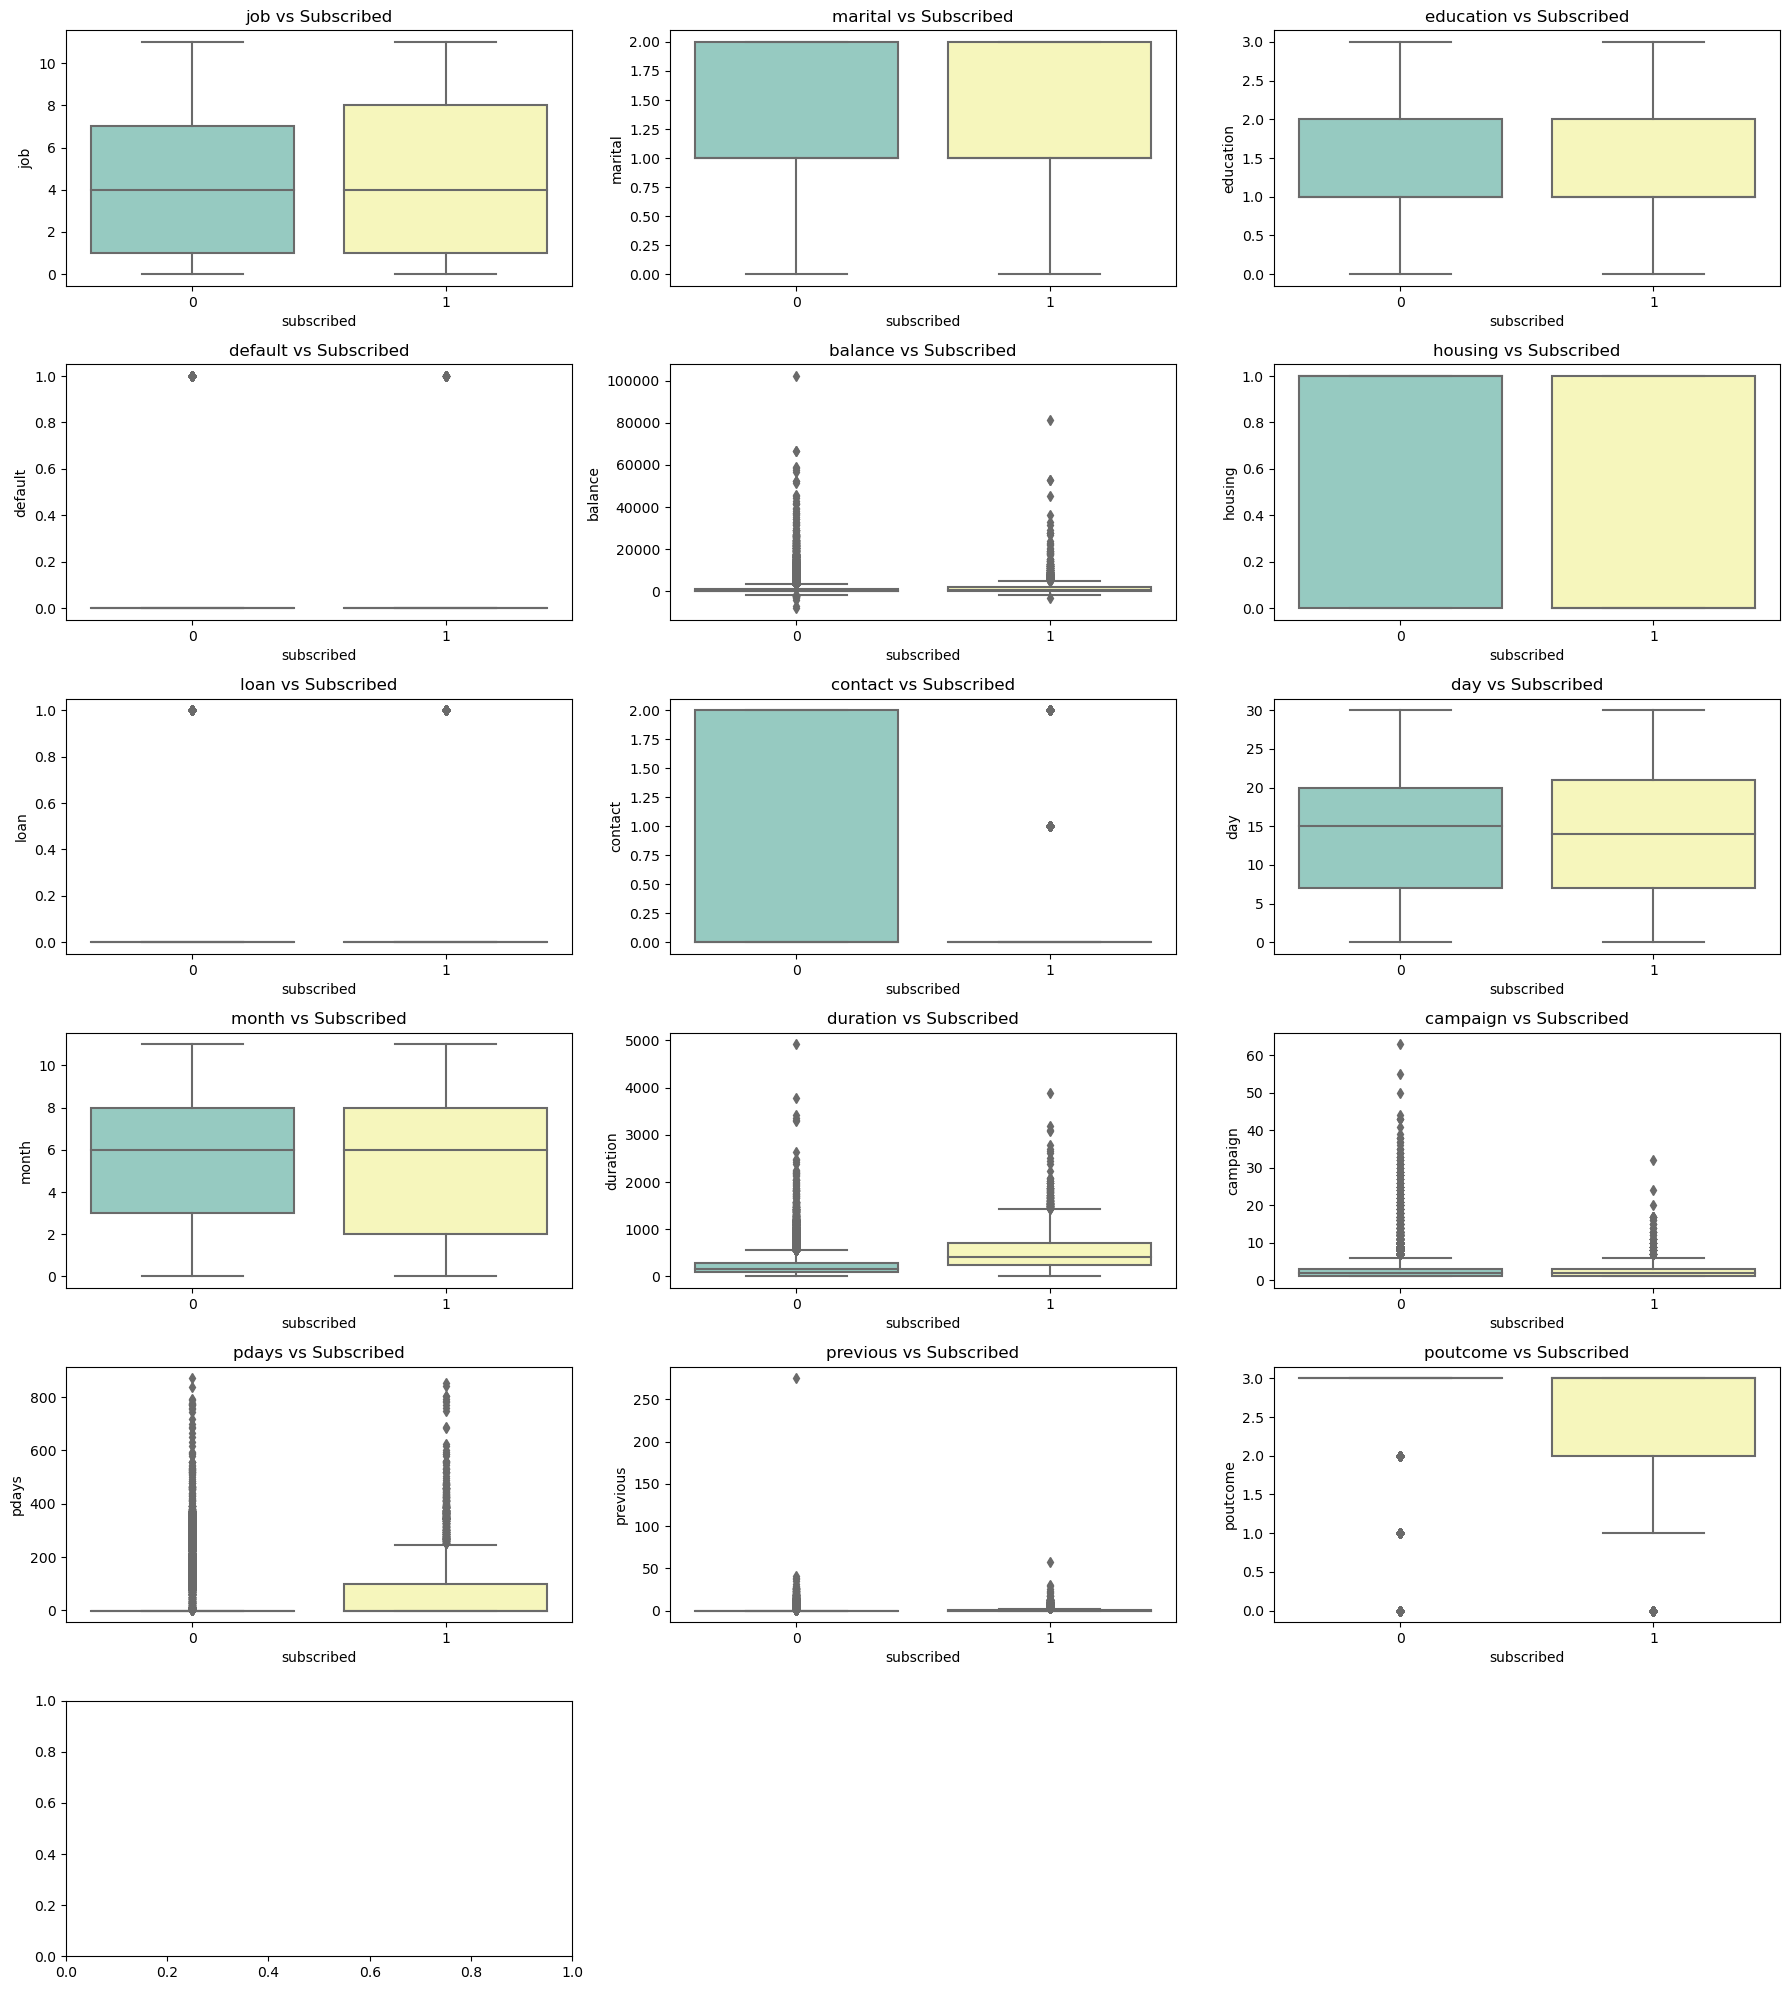

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
color_palette = sns.color_palette("Set3")

columns_for_analysis = ['job', 'marital', 'education', 'default', 'balance',
                         'housing', 'loan', 'contact', 'day', 'month', 'duration',
                         'campaign', 'pdays', 'previous', 'poutcome']

for i, column in enumerate(columns_for_analysis):
    row_index = i // 3
    col_index = i % 3

    if train_data[column].dtype == 'object':
        # For categorical columns
        sns.countplot(x=column, hue='subscribed', data=train_data, ax=axes[row_index, col_index], palette=color_palette)
    else:
        # For numerical columns
        sns.boxplot(x='subscribed', y=column, data=train_data, ax=axes[row_index, col_index], palette=color_palette)

    axes[row_index, col_index].set_title(f'{column} vs Subscribed')

axes[5, 1].axis('off')
axes[5, 2].axis('off')

plt.tight_layout()
plt.show()

### <font color='red'>Multivariate Analysis</font>

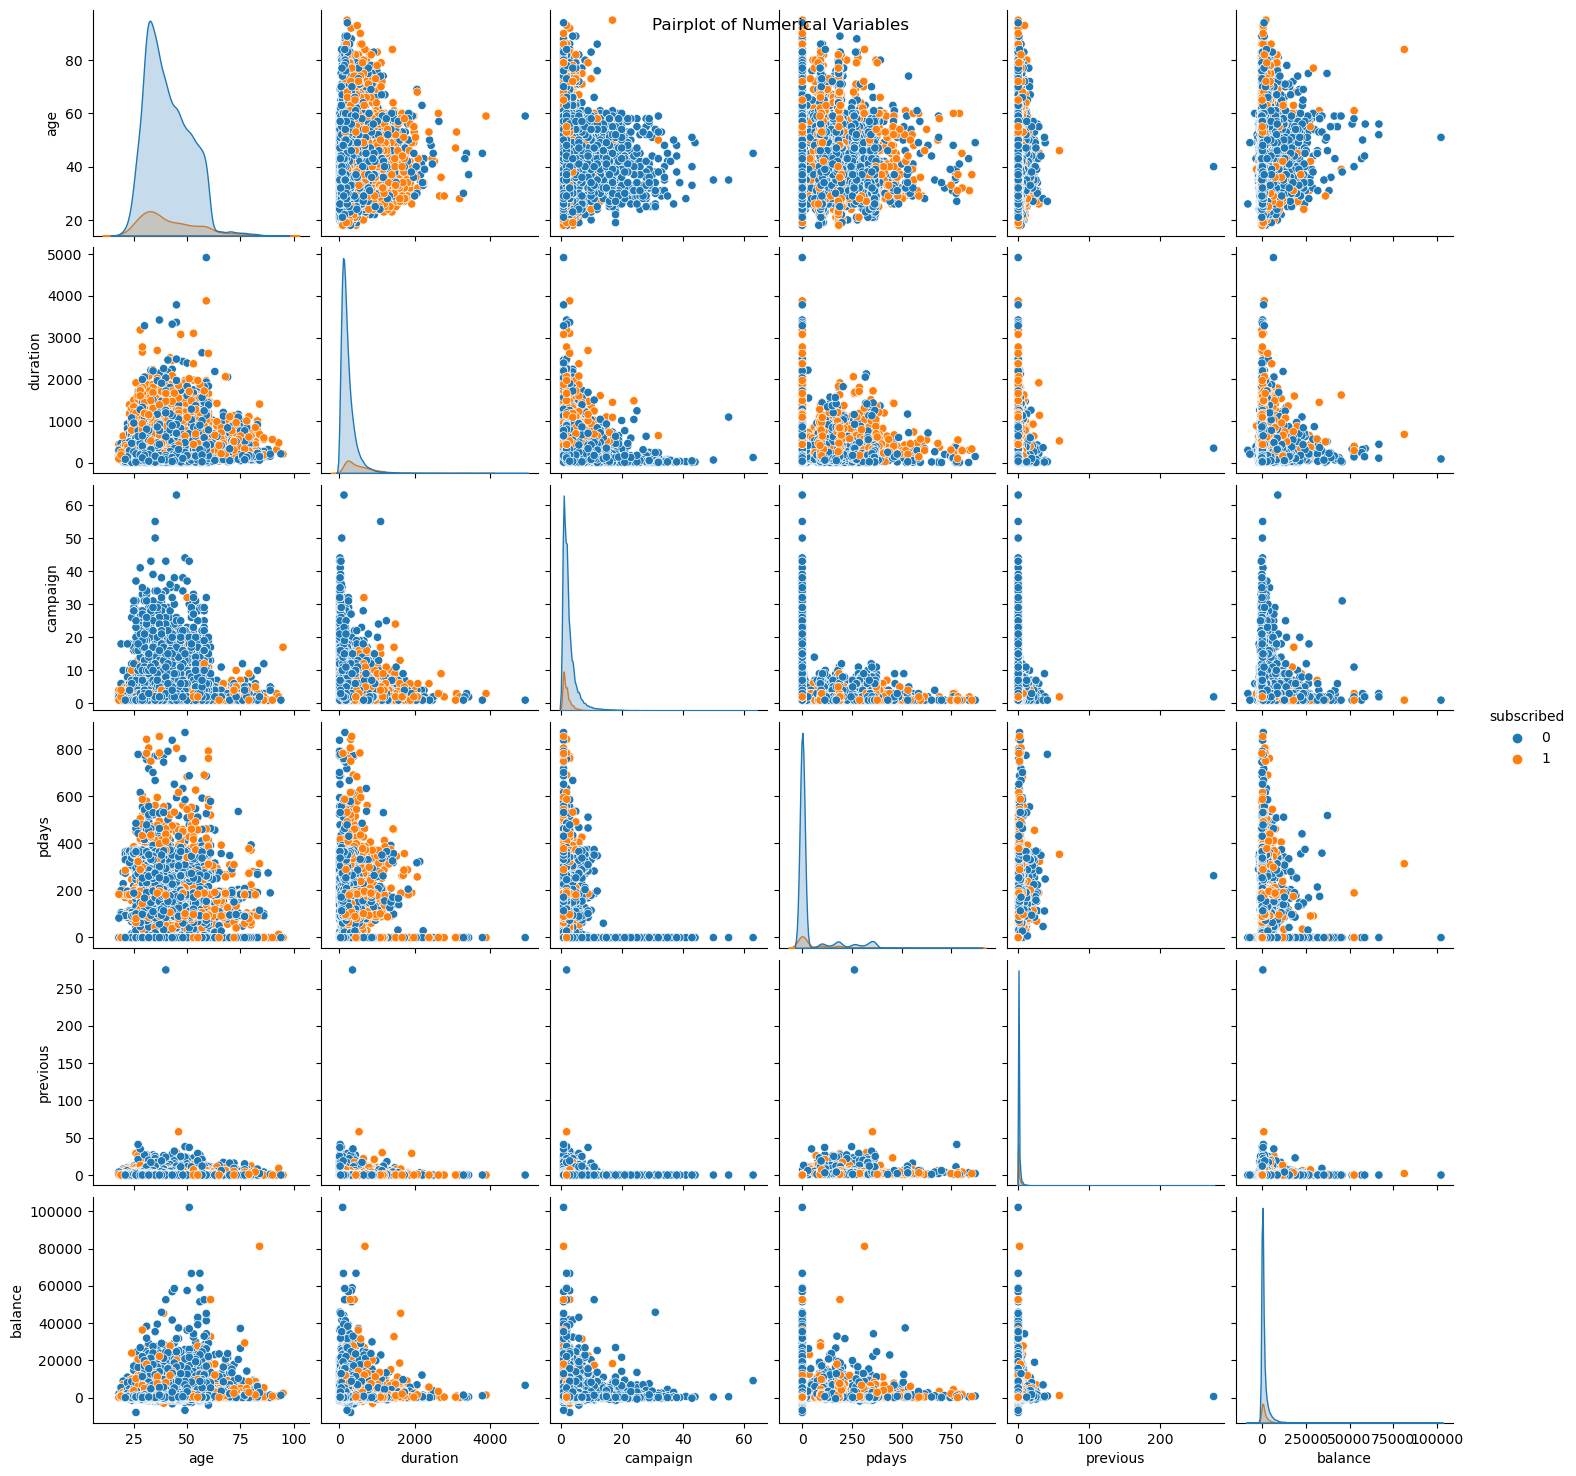

In [29]:
numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance']
sns.pairplot(train_data[numerical_variables + ['subscribed']], hue='subscribed', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

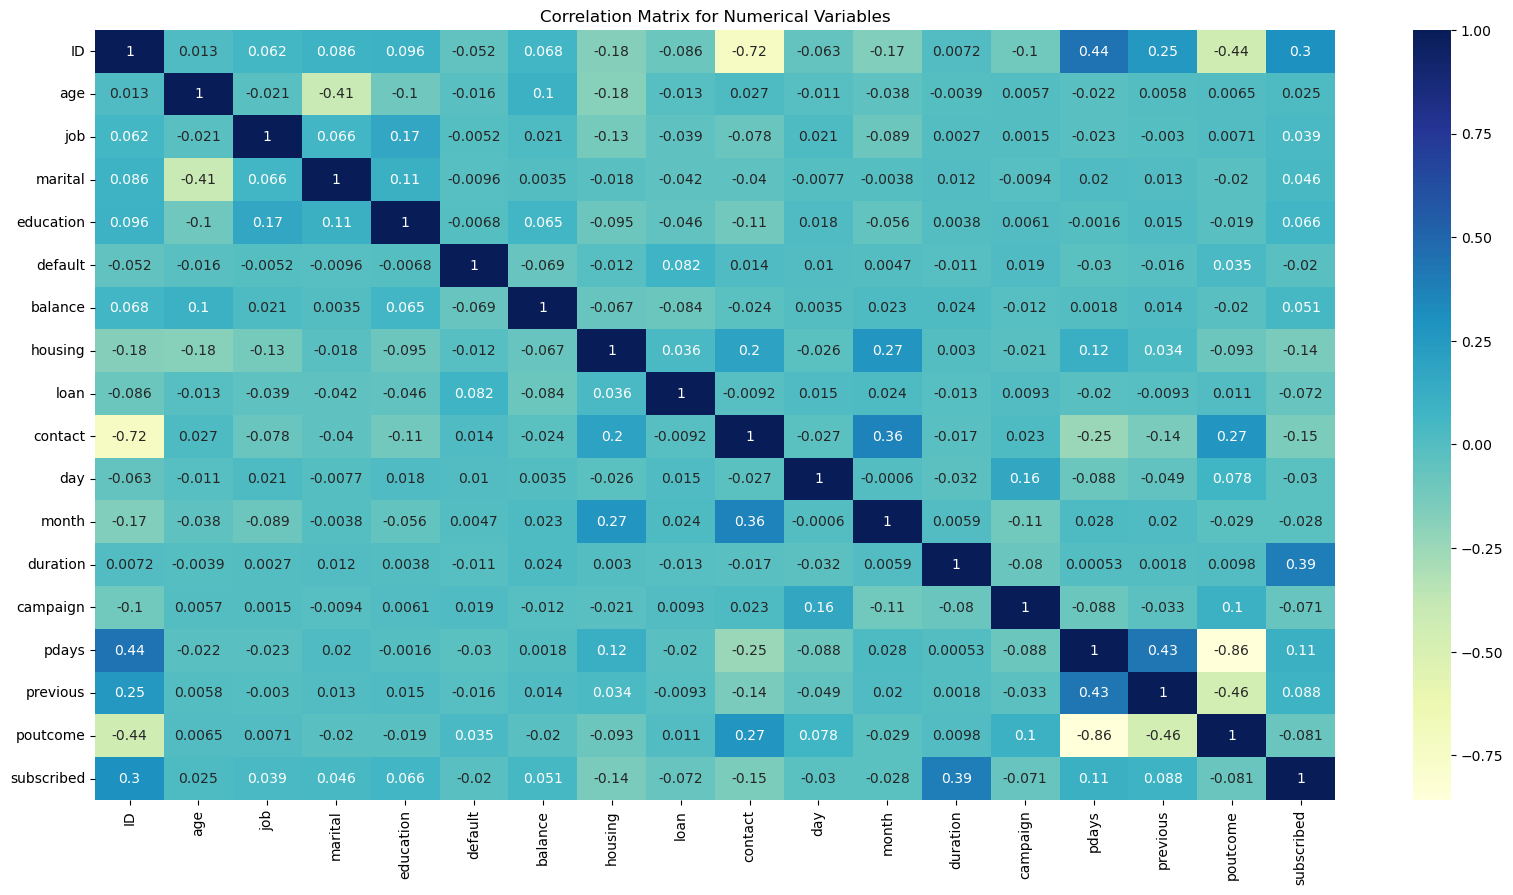

In [30]:
td = train_data.corr()
td

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(td, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [31]:
td

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


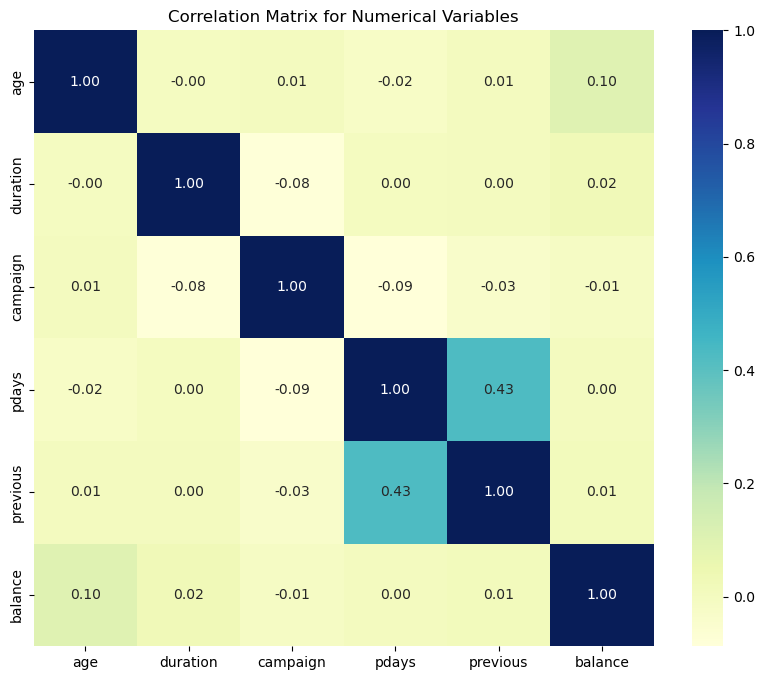

In [32]:
correlation_matrix = train_data[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

These correlations provide insights into the relationships between various features and the likelihood of subscription:-

- __Age and Subscription__: There is a very weak positive correlation (0.0245) between age and subscription. This suggests that age alone does not seem to have a strong influence on whether a person subscribes.

- __Balance and Subscription__: The balance does not show a strong correlation with subscription (0.0508), indicating that the account balance alone may not be a significant factor in predicting subscriptions.

- __Duration and Subscription__: The duration of the call has a moderate positive correlation (0.3898) with subscription. This suggests that longer call durations are associated with a higher likelihood of subscription.

- __Number of Contacts (Campaign) and Subscription__: The number of contacts during the campaign (campaign) has a weak negative correlation (-0.0706) with subscription. This implies that a higher number of campaign contacts is generally associated with a slightly lower likelihood of subscription.

- __Days Since Last Contact (Pdays) and Subscription__: The number of days since the client was last contacted (pdays) has a weak positive correlation (0.1083) with subscription. This suggests that a longer duration since the last contact may be associated with a slightly higher likelihood of subscription.

- __Previous Contacts and Subscription__: The number of contacts performed before this campaign (previous) has a weak positive correlation (0.0881) with subscription. This implies that clients who were contacted more in previous campaigns may have a slightly higher likelihood of subscription.

- __Outcome of Previous Campaign (Poutcome) and Subscription__: The outcome of the previous marketing campaign (poutcome) has a weak negative correlation (-0.0809) with the current subscription status. This suggests that the success or failure of the previous campaign may have a slight influence on the current subscription outcome.

## <font color='red'>Machine Learning</font>

In [33]:
X = train_data.drop(['ID', 'subscribed'], axis=1)
y = train_data['subscribed']

In [34]:
X_test_data = test_data.drop(['ID'], axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistc Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logistic_reg_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg_model.fit(X_train, y_train)
y_pred_logistic_reg = logistic_reg_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
classification_report_logistic_reg = classification_report(y_test, y_pred_logistic_reg)
confusion_matrix_logistic_reg = confusion_matrix(y_test, y_pred_logistic_reg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic_reg}")
print("Classification Report:\n", classification_report_logistic_reg)
print("Confusion Matrix:\n", confusion_matrix_logistic_reg)

Logistic Regression Results:
Accuracy: 0.8862559241706162
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      5599
           1       0.52      0.21      0.30       731

    accuracy                           0.89      6330
   macro avg       0.71      0.59      0.62      6330
weighted avg       0.86      0.89      0.86      6330

Confusion Matrix:
 [[5455  144]
 [ 576  155]]


C:\Users\Mahima\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest Classifier

In [37]:
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Evaluate Random Forest Classifier
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_random_forest}")
print("Classification Report:\n", classification_report_random_forest)
print("Confusion Matrix:\n", confusion_matrix_random_forest)


Random Forest Classifier Results:
Accuracy: 0.9055292259083728
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.63      0.43      0.51       731

    accuracy                           0.91      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.89      0.91      0.90      6330

Confusion Matrix:
 [[5417  182]
 [ 416  315]]


### Decision Tree Classifier

In [38]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Evaluate Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Classification Report:\n", classification_report_decision_tree)
print("Confusion Matrix:\n", confusion_matrix_decision_tree)


Decision Tree Classifier Results:
Accuracy: 0.865086887835703
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5599
           1       0.42      0.47      0.44       731

    accuracy                           0.87      6330
   macro avg       0.68      0.69      0.68      6330
weighted avg       0.87      0.87      0.87      6330

Confusion Matrix:
 [[5135  464]
 [ 390  341]]


## <font color='red'>Conclusion</font>
### Seeing the performances of model <font color ="Red"> _Random Forest Classifier_</font>  is the best model, now lets predict y_test using the same.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use X_test for making predictions
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Display classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_random_forest))

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.63      0.43      0.51       731

    accuracy                           0.91      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.89      0.91      0.90      6330



In [40]:
# Make predictions on the test data
y_pred_test = random_forest_classifier.predict(X_test_data)

# Display the predicted values
print("Predicted values for y_test:")
print(y_pred_test)

Predicted values for y_test:
[0 0 0 ... 0 1 0]


In [41]:
# Create a DataFrame for predicted values
submissions = pd.DataFrame()
submissions['ID'] = test_data['ID']
submissions['subscribed'] = y_pred_test

print(submissions['subscribed'].value_counts())

# Save the DataFrame to a CSV file
submissions.to_csv('predicted_subscriptions.csv', index=False)

0    12576
1      988
Name: subscribed, dtype: int64


In [42]:
# Replace 0 with 'no' and 1 with 'yes' in the 'subscribed' column
submissions['subscribed'].replace(0, 'no', inplace=True)
submissions['subscribed'].replace(1, 'yes', inplace=True)

print(submissions['subscribed'].value_counts())

no     12576
yes      988
Name: subscribed, dtype: int64


In [43]:
submissions

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,yes


# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="yellow"><h1>Thankyou!</h1></font></div>